In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [6]:
# Remove unnesseasry columns
df.drop(columns=["year","month","Unnamed: 0"],axis=1,inplace=True)
df.head(2)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394


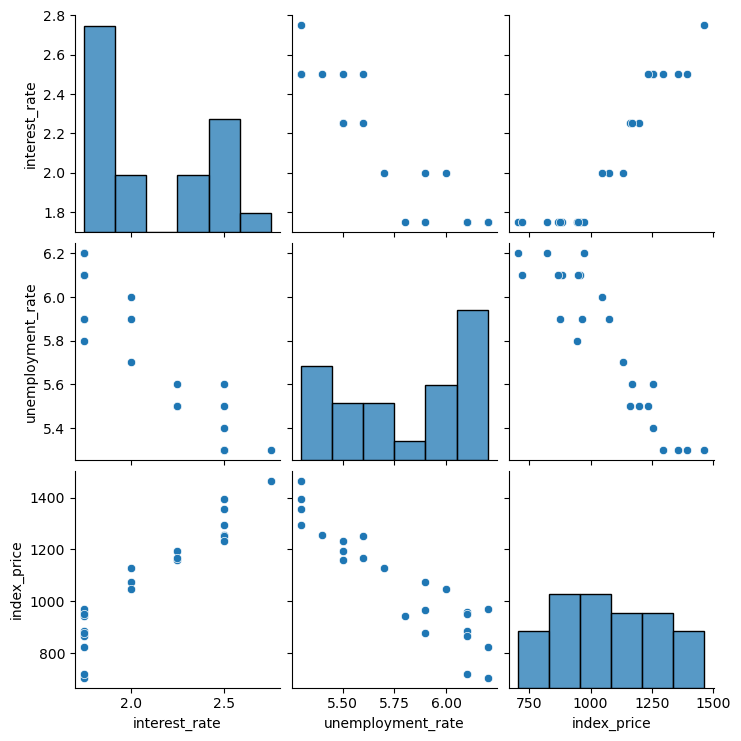

In [7]:
sns.pairplot(df)

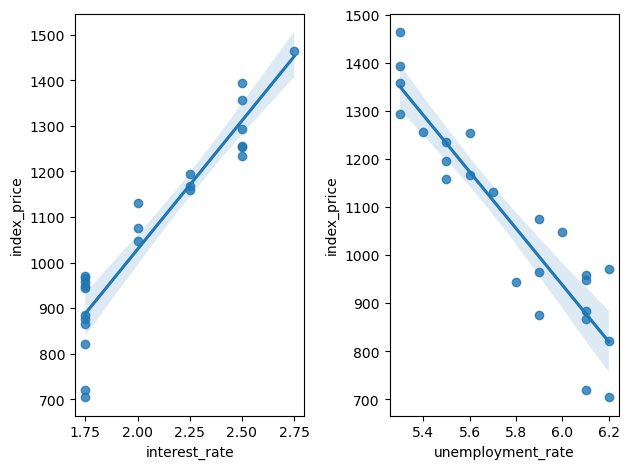

In [17]:
# regression plot
plt.subplot(1,2,1)
sns.regplot(x=df["interest_rate"],y=df["index_price"])
plt.subplot(1,2,2)
sns.regplot(x=df["unemployment_rate"],y=df["index_price"])
plt.tight_layout()

In [22]:
# separete independent and dependent variables
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [23]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=.28)

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# Apply regression 
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [26]:
print(regression.coef_)
print(regression.intercept_)

[ 284.26103905 -340.30042342]
2432.957053565431


<Axes: xlabel='interest_rate', ylabel='index_price'>

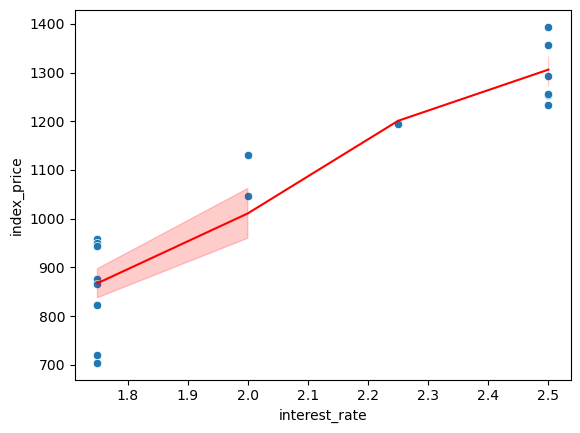

In [49]:
# plot the solution
sns.scatterplot(x=X_train["interest_rate"],y=Y_train)
sns.lineplot(x=X_train["interest_rate"],y=regression.predict(X_train),color="r")

In [40]:
# predict the y_test
Y_pred=regression.predict(X_test)

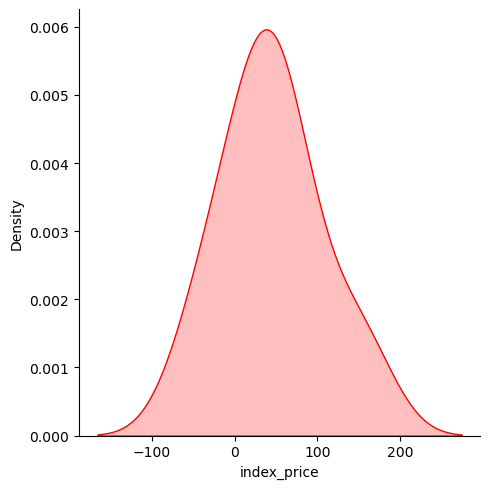

In [50]:
residual=Y_test-Y_pred
sns.displot(residual,kind="kde",fill=True,color="red")

In [38]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5208.3372381890895
56.923833206916505
72.16881070233241


In [39]:
# R_square
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print("R_square",score)
print("Adjusted R_square",1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

R_square 0.8362017240147301
Adjusted R_square 0.7543025860220952
